# 一元线性回归

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"]=["SimHei"]

In [6]:
x=tf.constant([137.97,104.50,100.00,124.32,79.20,99.00,124.00,114.00,106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21])
y=tf.constant([145.00,110.00,93.00,116.00,65.32,104.00,118.00,91.00,62.00,133.00,51.00,45.00,78.50,69.65,75.69,95.30])

In [11]:
meanX=tf.reduce_mean(x)
meanY=tf.reduce_mean(y)
sumXY=tf.reduce_sum((x-meanX)*(y-meanY))
sumX=tf.reduce_sum((x-meanX)*(x-meanX))
w=sumXY/sumX
b=meanY-w*meanX

In [14]:
print("权值w=",w.numpy(),"\n偏置值b=",b.numpy())
print("线性模型：y=",w.numpy(),"*x+",b.numpy())

权值w= 0.8945604 
偏置值b= 5.4108505
线性模型：y= 0.8945604 *x+ 5.4108505


In [20]:
x_test=np.array([128.15,45.00,141.43,106.27,99.00,53.84,85.36,70.00])
y_pred=(w*x_test+b).numpy()

print("面积\t估计房价")
n=len(x_test)
for i in range(n):
    print(x_test[i],"\t",round(y_pred[i],3))

面积	估计房价
128.15 	 120.049
45.0 	 45.666
141.43 	 131.929
106.27 	 100.476
99.0 	 93.972
53.84 	 53.574
85.36 	 81.771
70.0 	 68.03


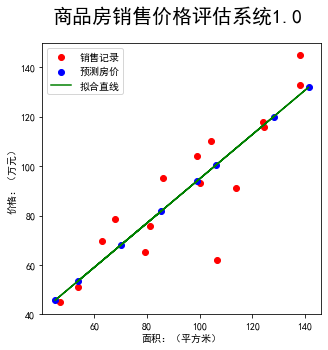

In [35]:
plt.figure(figsize=(5,5))

plt.scatter(x,y,color="red",label="销售记录")
plt.scatter(x_test,y_pred,color="blue",label="预测房价")
plt.plot(x_test,y_pred,color="green",label="拟合直线")

plt.xlabel("面积：（平方米）")
plt.ylabel("价格：（万元）")

#plt.xlim(40,150)#x坐标范围
#plt.ylim(40,150)

plt.suptitle("商品房销售价格评估系统1.0",fontsize=20)

plt.legend(loc="upper left")#样式格式位置
plt.show()

# 多元线性回归

In [ ]:
x=tf.constant([137.97,104.50,100.00,124.32,79.20,99.00,124.00,114.00,106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21])
y=tf.constant([145.00,110.00,93.00,116.00,65.32,104.00,118.00,91.00,62.00,133.00,51.00,45.00,78.50,69.65,75.69,95.30])
